In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
messages.length.describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c6fd4c190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7c6fcb9990>], dtype=object)

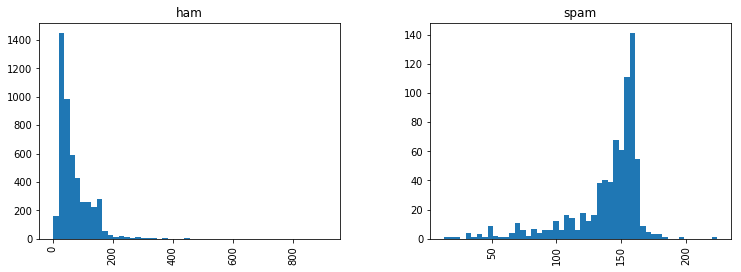

In [7]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/mayank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [17]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
messages['message'].apply(text_process)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [20]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
from wordcloud import WordCloud

In [22]:
ham_words = ' '.join(list(messages[messages['label']=='ham']['message']))
spam_words = ' '.join(list(messages[messages['label']=='spam']['message']))

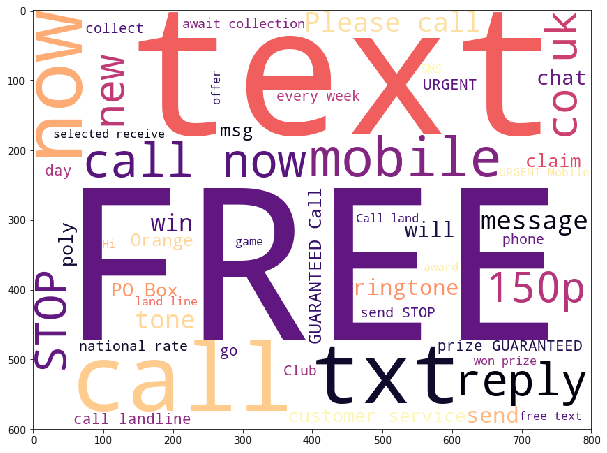

In [23]:
spam_wordcloud= WordCloud(width=800, height=600, background_color='white', max_words=50,colormap='magma').generate(spam_words)
plt.figure( figsize=(10,8))
plt.imshow(spam_wordcloud)

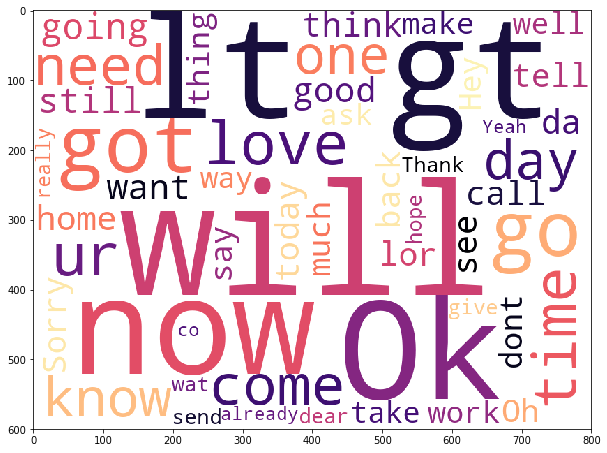

In [24]:
ham_wordcloud= WordCloud(width=800, height=600, background_color='white', max_words=50,colormap='magma').generate(ham_words)
plt.figure( figsize=(10,8))
plt.imshow(ham_wordcloud)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


11425


In [27]:
messages_bow = bow_transformer.transform(messages['message'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


In [28]:
print('Shape of the Sparse Matrix: ', messages_bow.shape)

('Shape of the Sparse Matrix: ', (5572, 11425))


In [29]:
messages_bow.nnz

50548

In [30]:
sparsity = (100*messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

In [31]:
print('sparsity:', sparsity)

('sparsity:', 0)


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer


In [33]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [34]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [35]:
from sklearn.model_selection import train_test_split
X= messages_tfidf
y= messages['label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [55]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)


def predict_labels(clf, features):
    return (clf.predict(features))

In [56]:
A = MultinomialNB()
B = DecisionTreeClassifier()
C = AdaBoostClassifier()
D = KNeighborsClassifier()
E = RandomForestClassifier()
F= LogisticRegression()
G= SVC()
H= MLPClassifier()

In [59]:
clf = [A,B,C,D,E,F,G,H]
pred_val = [0,0,0,0,0,0,0,0]

for a in range(0,8):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred, average= "binary", pos_label= 'spam') 
    print (pred_val[a])

0.869300911854
0.88202247191
0.841791044776
0.423728813559
0.869300911854
0.754966887417
0.0
0.943181818182


Text(0.5,1,u'Accuracy of Models')

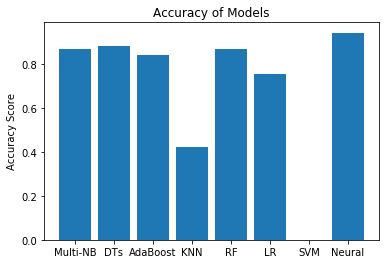

In [60]:
models = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF','LR', 'SVM', 'Neural')
y_pos = np.arange(len(models))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val,)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')

In [61]:
spam_detect_model = MultinomialNB()

In [62]:
spam_detect_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
predictions = spam_detect_model.predict(X_test)


In [64]:
from sklearn.metrics import classification_report


In [65]:
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1207
       spam       1.00      0.77      0.87       186

avg / total       0.97      0.97      0.97      1393



In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {'alpha': [0, 1, 2, 5,10]} 

In [68]:
grid = GridSearchCV( MultinomialNB(),param_grid,refit=True,verbose=3)

In [69]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] alpha=0 .........................................................
[CV] .................... alpha=0, score=0.965541995693, total=   0.0s
[CV] alpha=0 .........................................................
[CV] .................... alpha=0, score=0.961234745154, total=   0.0s
[CV] alpha=0 .........................................................
[CV] ..................... alpha=0, score=0.97343862168, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .................... alpha=1, score=0.948312993539, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .................... alpha=1, score=0.935391241924, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .................... alpha=1, score=0.934673366834, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ............

/usr/local/lib/python2.7/dist-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................... alpha=2, score=0.896625987078, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ..................... alpha=2, score=0.89088298636, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ..................... alpha=5, score=0.86575735822, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ..................... alpha=5, score=0.86575735822, total=   0.0s
[CV] alpha=5 .........................................................
[CV] ..................... alpha=5, score=0.86575735822, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .................... alpha=10, score=0.86575735822, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .................... alpha=10, score=0.86575735822, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0, 1, 2, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [70]:
grid.best_params_

{'alpha': 0}

In [71]:
grid_predictions = grid.predict(X_test)

In [72]:
print (classification_report(y_test, grid_predictions))

             precision    recall  f1-score   support

        ham       0.99      0.98      0.98      1207
       spam       0.88      0.91      0.89       186

avg / total       0.97      0.97      0.97      1393

